In [3]:
import matplotlib.pyplot as plt
import numpy as np
from deep_dating.datasets import load_all_dating_datasets, DatasetSplitter, SetType, DatasetName
from deep_dating.preprocessing import Preprocessor

Seed set to 42


In [4]:
datasets = load_all_dating_datasets()
mps, clamm, scribble = datasets

Warning! File list found in header does not entirely match images found in directory. 3 image inconsistencies found.
	Differences found: {'../../datasets/scribblelens.supplement.original.pages/scribblelens.corpus.v1/nl/unsupervised/roggeveen/60.1/originalpage.page0060.1.jpg', '../../datasets/scribblelens.supplement.original.pages/scribblelens.corpus.v1/nl/unsupervised/owic.brieven.49/41.14/originalpage.NL-HaNA_1.05.01.01_49_41_0014.jpg', '../../datasets/scribblelens.supplement.original.pages/scribblelens.corpus.v1/nl/unsupervised/roggeveen/61.0/originalpage.page0061.0.jpg'}


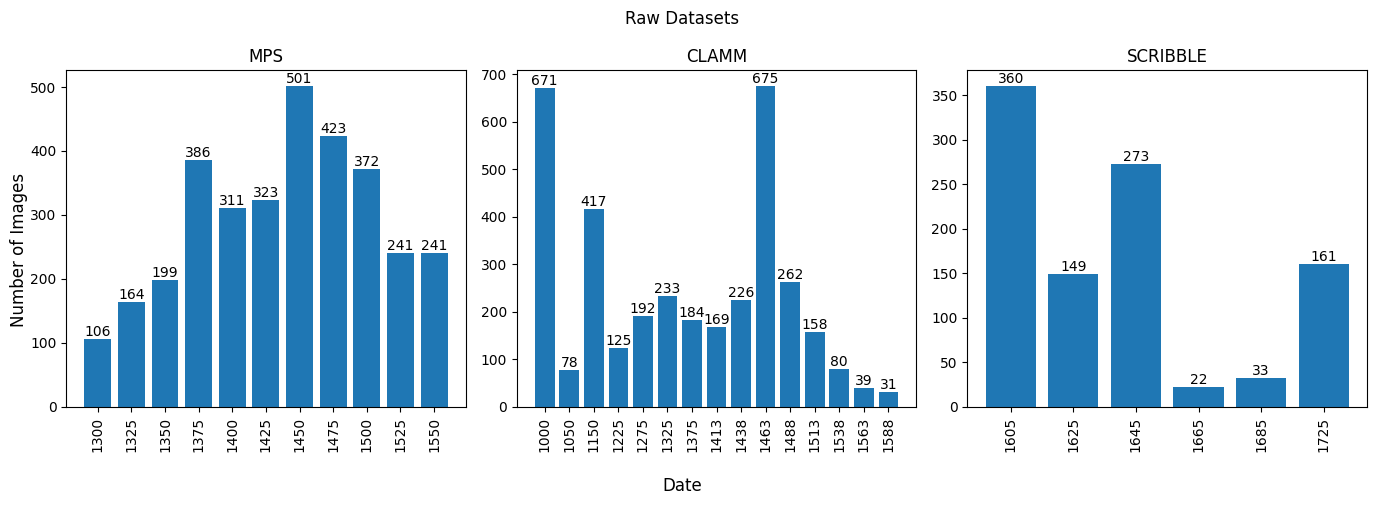

In [18]:
def plot_frequency(ax, dates, title):
    unique_dates, counts = np.unique(dates, return_counts=True)

    ax.bar(unique_dates.astype(np.int32).astype(str), counts)
    ax.set_title(title)

    for tick in ax.get_xticklabels():
        tick.set_rotation(90)

    for bars in ax.containers:
        ax.bar_label(bars)

fig, axs = plt.subplots(1, 3, figsize=(14, 5))

for i, dataset in enumerate(datasets):
    plot_frequency(axs[i], dataset.y, dataset.name) # i // 2, i % 2

fig.supylabel("Number of Images")
fig.supxlabel("Date")
fig.suptitle("Raw Datasets")
fig.tight_layout()

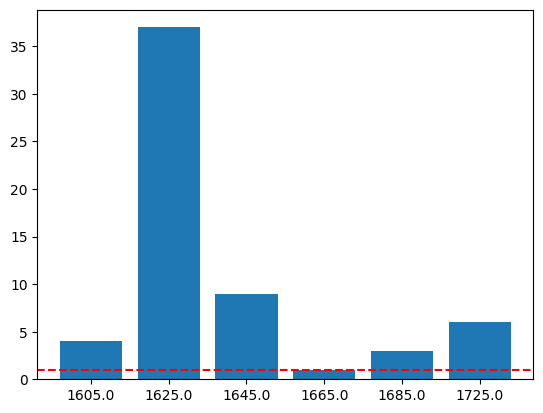

In [12]:
def get_bins(start_date=1595, bin_width=20, max_date=1726):
    bins = []
    bin_tokens = []

    while start_date < max_date:
        end_date = start_date + bin_width
        bins.append((start_date, end_date))
        bin_tokens.append(np.mean([start_date, end_date]))
        start_date = end_date
    
    return bins, bin_tokens

def apply_bins(dates, bins, bin_tokens):
    new_dates = np.zeros(dates.shape)

    for (start_date, end_date), token in zip(bins, bin_tokens):
        idxs = np.where((dates >= start_date) & (dates < end_date))
        new_dates[idxs] = token

    return new_dates

x = []
values = []
for key, val in scribble.writer_ids_per_date.items():
    x += list(val)
    values += [key] * len(val)

x = np.array(x)
values = np.array(values)

bins, bin_tokens = get_bins()
new_values = apply_bins(values, bins, bin_tokens)

unique, counts = np.unique(new_values, return_counts=True)
plt.bar(unique.astype(str), counts)
plt.axhline(1, color="red", linestyle="--")


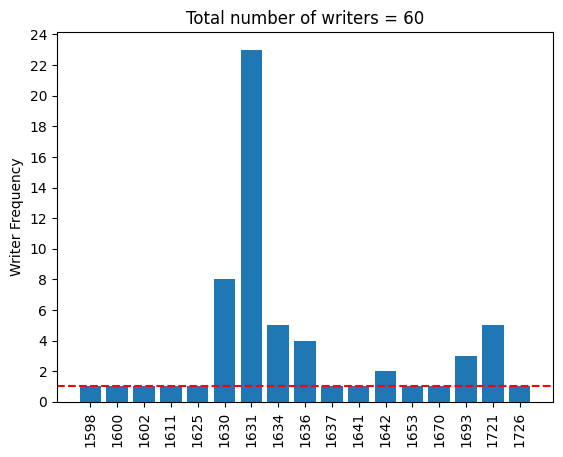

In [19]:
# ScribbleLens dataset

s_dates = sorted(scribble.writer_ids_per_date.keys())

freq = [len(scribble.writer_ids_per_date[x]) for x in s_dates]
plt.bar([str(x) for x in s_dates], freq)
plt.yticks(np.arange(0, np.max(freq) + 2, 2))
plt.axhline(1, color="red", linestyle="--")

ax = plt.gca()
for tick in ax.get_xticklabels():
    tick.set_rotation(90)

plt.ylabel("Writer Frequency")
writers = list(set().union(*scribble.writer_ids_per_date.values()))
plt.title(f"Total number of writers = {len(writers)}")

plt.show()

In [5]:
for dataset in datasets:
    print(dataset.name)
    splitter = DatasetSplitter(dataset)
    for set_type in [SetType.TRAIN, SetType.VAL, SetType.TEST]:
        X, y = splitter.get_data(set_type)
        print(set_type, len(X))
    print("---")

MPS
SetType.TRAIN 1828
SetType.VAL 458
SetType.TEST 981
---
CLAMM
SetType.TRAIN 1982
SetType.VAL 496
SetType.TEST 1062
---
SCRIBBLE
SetType.TRAIN 558
SetType.VAL 140
SetType.TEST 300
---


7805.0
1779.0
3621.0


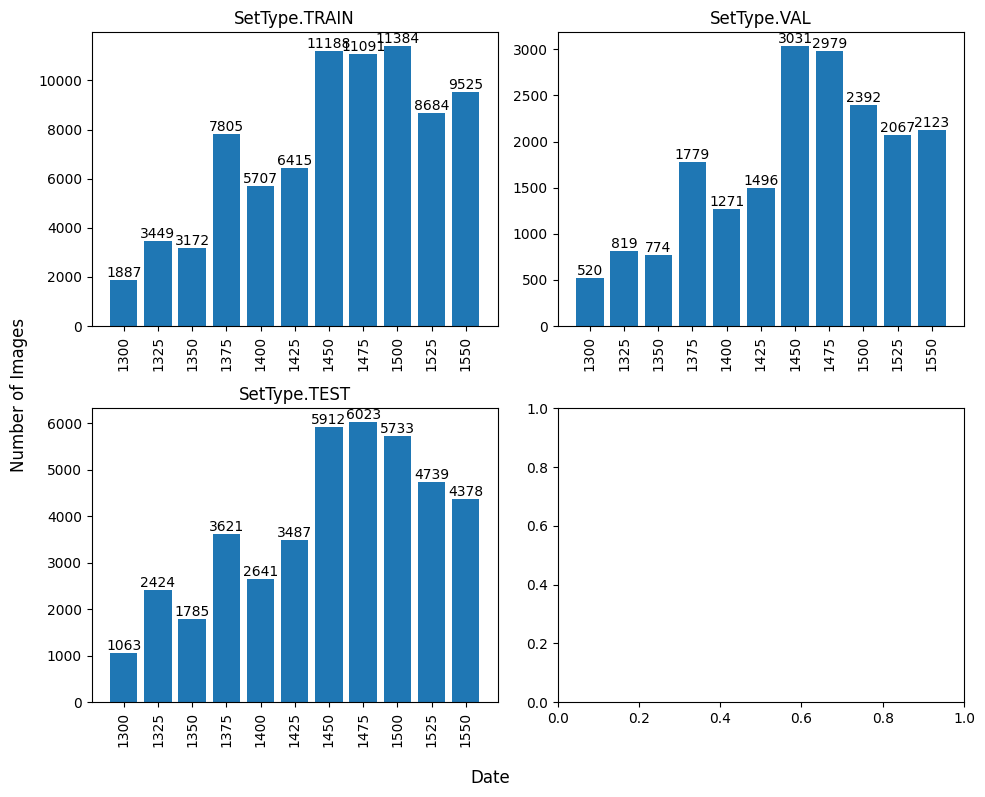

In [7]:
preprocessor = Preprocessor(DatasetName.MPS)

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

for i, set_type in enumerate([SetType.TRAIN, SetType.VAL, SetType.TEST]):
    X, y = preprocessor.read_preprocessing_header(set_type)
    plot_frequency(axs[i // 2, i % 2], y, set_type)

fig.supylabel("Number of Images")
fig.supxlabel("Date")
fig.tight_layout()